In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv(r'dataset\defects_data.csv')

In [6]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [8]:
round(df.describe(), 2)

,defect_id,product_id,repair_cost
count,1000.00,1000.00,1000.00
mean,500.50,50.84,507.63
std,288.82,29.48,289.62
min,1.00,1.00,10.22
25%,250.75,26.00,270.90
50%,500.50,51.00,506.43
75%,750.25,77.00,759.06
max,1000.00,100.00,999.64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


## Repair Cost

Abaixo vamos avaliar o preço de repararo com as diferentes colunas e atributos, O objetivo é avaliar quais colunas e/ou atributos tem mais relevância na variação do custo de reparo.

Text(0.5, 1.0, 'Repair Cost Per Severity')

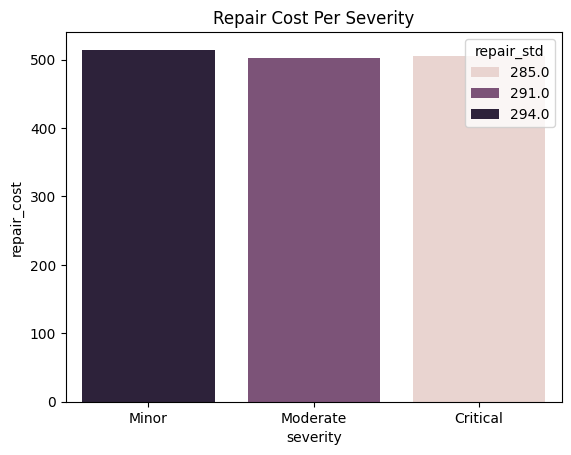

In [61]:
severity_repair_cost_mean = df.groupby(['severity'])['repair_cost'].mean()
severity_repair_cost_mean = severity_repair_cost_mean.reset_index()

severity_repair_cost_std = df.groupby(['severity'])['repair_cost'].std()
severity_repair_cost_std = severity_repair_cost_std.reset_index()
severity_repair_cost_std.rename(columns={'repair_cost': 'repair_std'}, inplace=True)

severity_repair = pd.concat([severity_repair_cost_mean, round(severity_repair_cost_std['repair_std'])], axis=1)

order = ['Minor', 'Moderate', 'Critical']
ax = sns.barplot(severity_repair, x='severity', y='repair_cost', hue='repair_std', order=order, hue_order=order)

ax.set_title('Repair Cost Per Severity')

Text(0.5, 1.0, 'Repair Cost Per Defect Type')

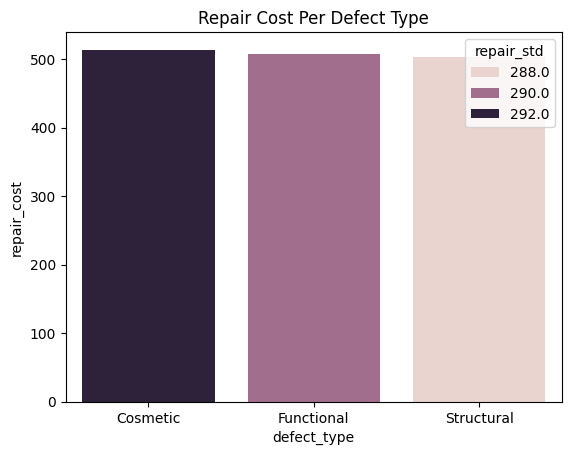

In [64]:
defect_type_repair_cost_mean = df.groupby(['defect_type'])['repair_cost'].mean()
defect_type_repair_cost_mean = defect_type_repair_cost_mean.reset_index()

defect_type_repair_cost_std = df.groupby(['defect_type'])['repair_cost'].std()
defect_type_repair_cost_std = defect_type_repair_cost_std.reset_index()
defect_type_repair_cost_std.rename(columns={'repair_cost': 'repair_std'}, inplace=True)

defect_type_repair = pd.concat([defect_type_repair_cost_mean, round(defect_type_repair_cost_std['repair_std'])], axis=1)

ax = sns.barplot(defect_type_repair, x='defect_type', y='repair_cost', hue='repair_std')

ax.set_title('Repair Cost Per Defect Type')

Text(0.5, 1.0, 'Repair Cost Per Defect Location')

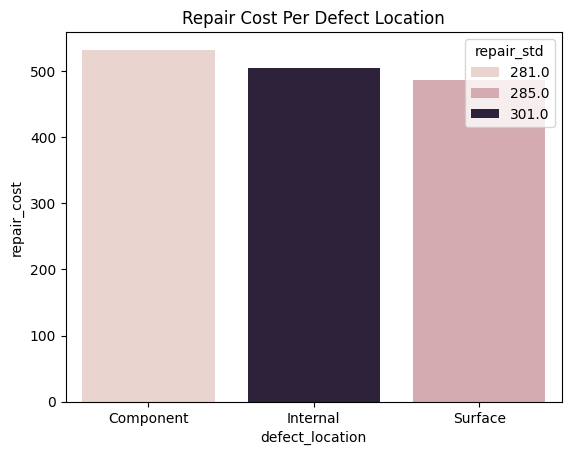

In [67]:
defect_location_repair_cost_mean = df.groupby(['defect_location'])['repair_cost'].mean()
defect_location_repair_cost_mean = defect_location_repair_cost_mean.reset_index()

defect_location_repair_cost_std = df.groupby(['defect_location'])['repair_cost'].std()
defect_location_repair_cost_std = defect_location_repair_cost_std.reset_index()
defect_location_repair_cost_std.rename(columns={'repair_cost': 'repair_std'}, inplace=True)

defect_location_repair = pd.concat([defect_location_repair_cost_mean, round(defect_location_repair_cost_std['repair_std'])], axis=1)

ax = sns.barplot(defect_location_repair, x='defect_location', y='repair_cost', hue='repair_std')

ax.set_title('Repair Cost Per Defect Location')

Text(0.5, 1.0, 'Repair Cost Per Inspaction Method')

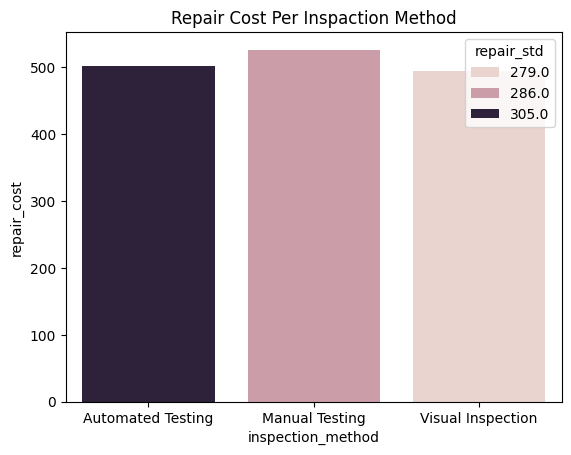

In [68]:
inpection_method_repair_cost_mean = df.groupby(['inspection_method'])['repair_cost'].mean()
inpection_method_repair_cost_mean = inpection_method_repair_cost_mean.reset_index()

inpection_method_repair_cost_std = df.groupby(['inspection_method'])['repair_cost'].std()
inpection_method_repair_cost_std = inpection_method_repair_cost_std.reset_index()
inpection_method_repair_cost_std.rename(columns={'repair_cost': 'repair_std'}, inplace=True)

inpection_method_repair = pd.concat([inpection_method_repair_cost_mean, round(inpection_method_repair_cost_std['repair_std'])], axis=1)

ax = sns.barplot(inpection_method_repair, x='inspection_method', y='repair_cost', hue='repair_std')

ax.set_title('Repair Cost Per Inspaction Method')

Text(0.5, 1.0, 'Count Defect Type Per Inspaction Method')

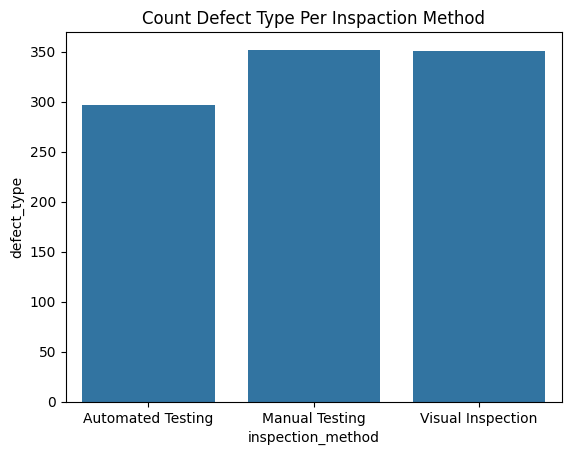

In [73]:
inspection_method_defect_type_count = df.groupby(['inspection_method'])['defect_type'].count()
inspection_method_defect_type_count = inspection_method_defect_type_count.reset_index()

ax = sns.barplot(inspection_method_defect_type_count, x='inspection_method', y='defect_type')

ax.set_title('Count Defect Type Per Inspaction Method')

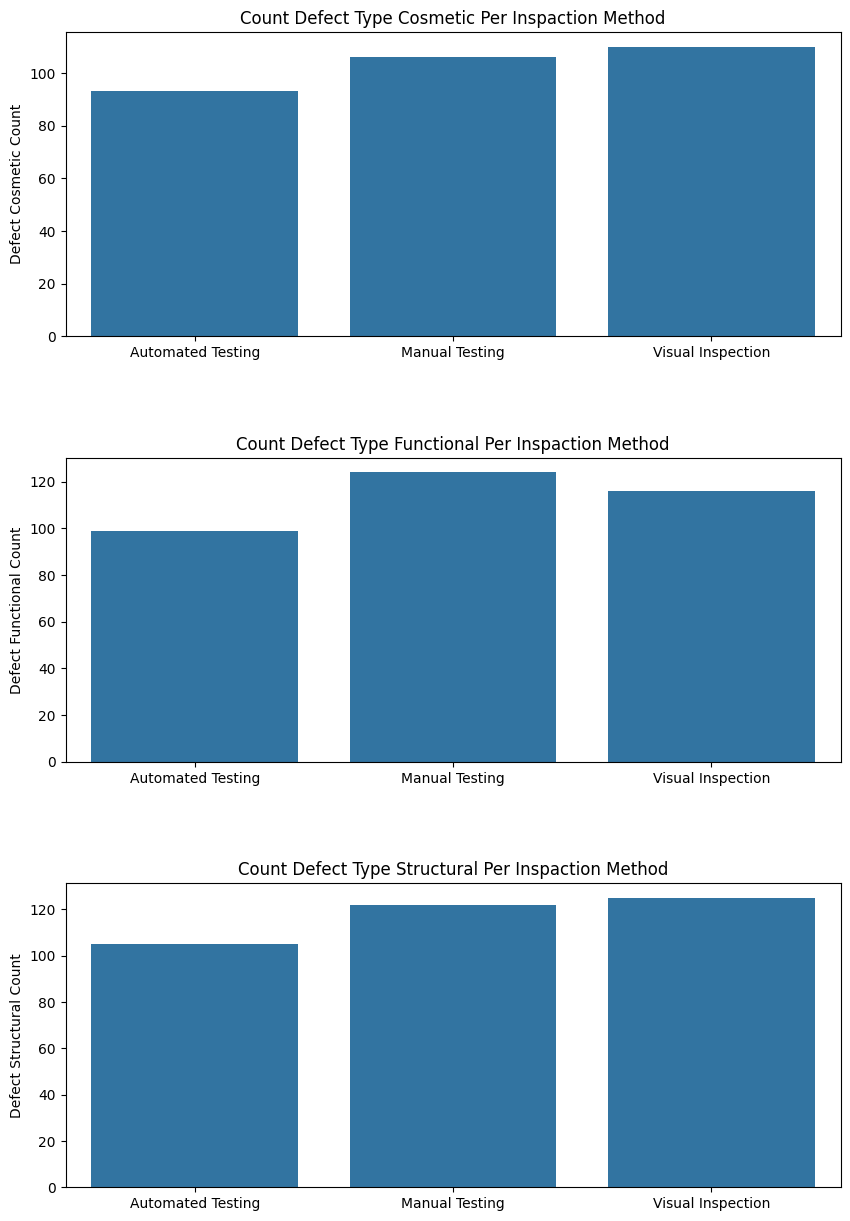

In [115]:
defects = np.unique(df['defect_type'].values)
fig, ax = plt.subplots(nrows=3, figsize=(10, 5 * len(defects)))
plt.subplots_adjust(hspace=0.4)

for i, defect in enumerate(defects):
    df_temp = df.query(f'defect_type == "{defect}"')
    inspection_method_defect_type_count = df_temp.groupby(['inspection_method'])['defect_type'].count()
    inspection_method_defect_type_count = inspection_method_defect_type_count.reset_index()

    sns.barplot(inspection_method_defect_type_count, x='inspection_method', y='defect_type', ax=ax[i])

    ax[i].set_title(f'Count Defect Type {defect} Per Inspaction Method')
    ax[i].set_ylabel(f'Defect {defect} Count')
    ax[i].set_xlabel(None)

plt.show()

Visivelmente nenhum dos atrituos tem impacto significativo para a variação do valor de reparo

# Distribuição do preço de reparo em difentes colunas e atributos
Objetivo: Avaliar como está a distribuição dos preços de reparo para cada categoria das colunas defect_type, defect_location, severity e inspaction_method

In [123]:
selected_columns = ['defect_type', 'defect_location', 'severity', 'inspection_method']
columns = {column: [category for category in np.unique(df[column].values)] for column in selected_columns}

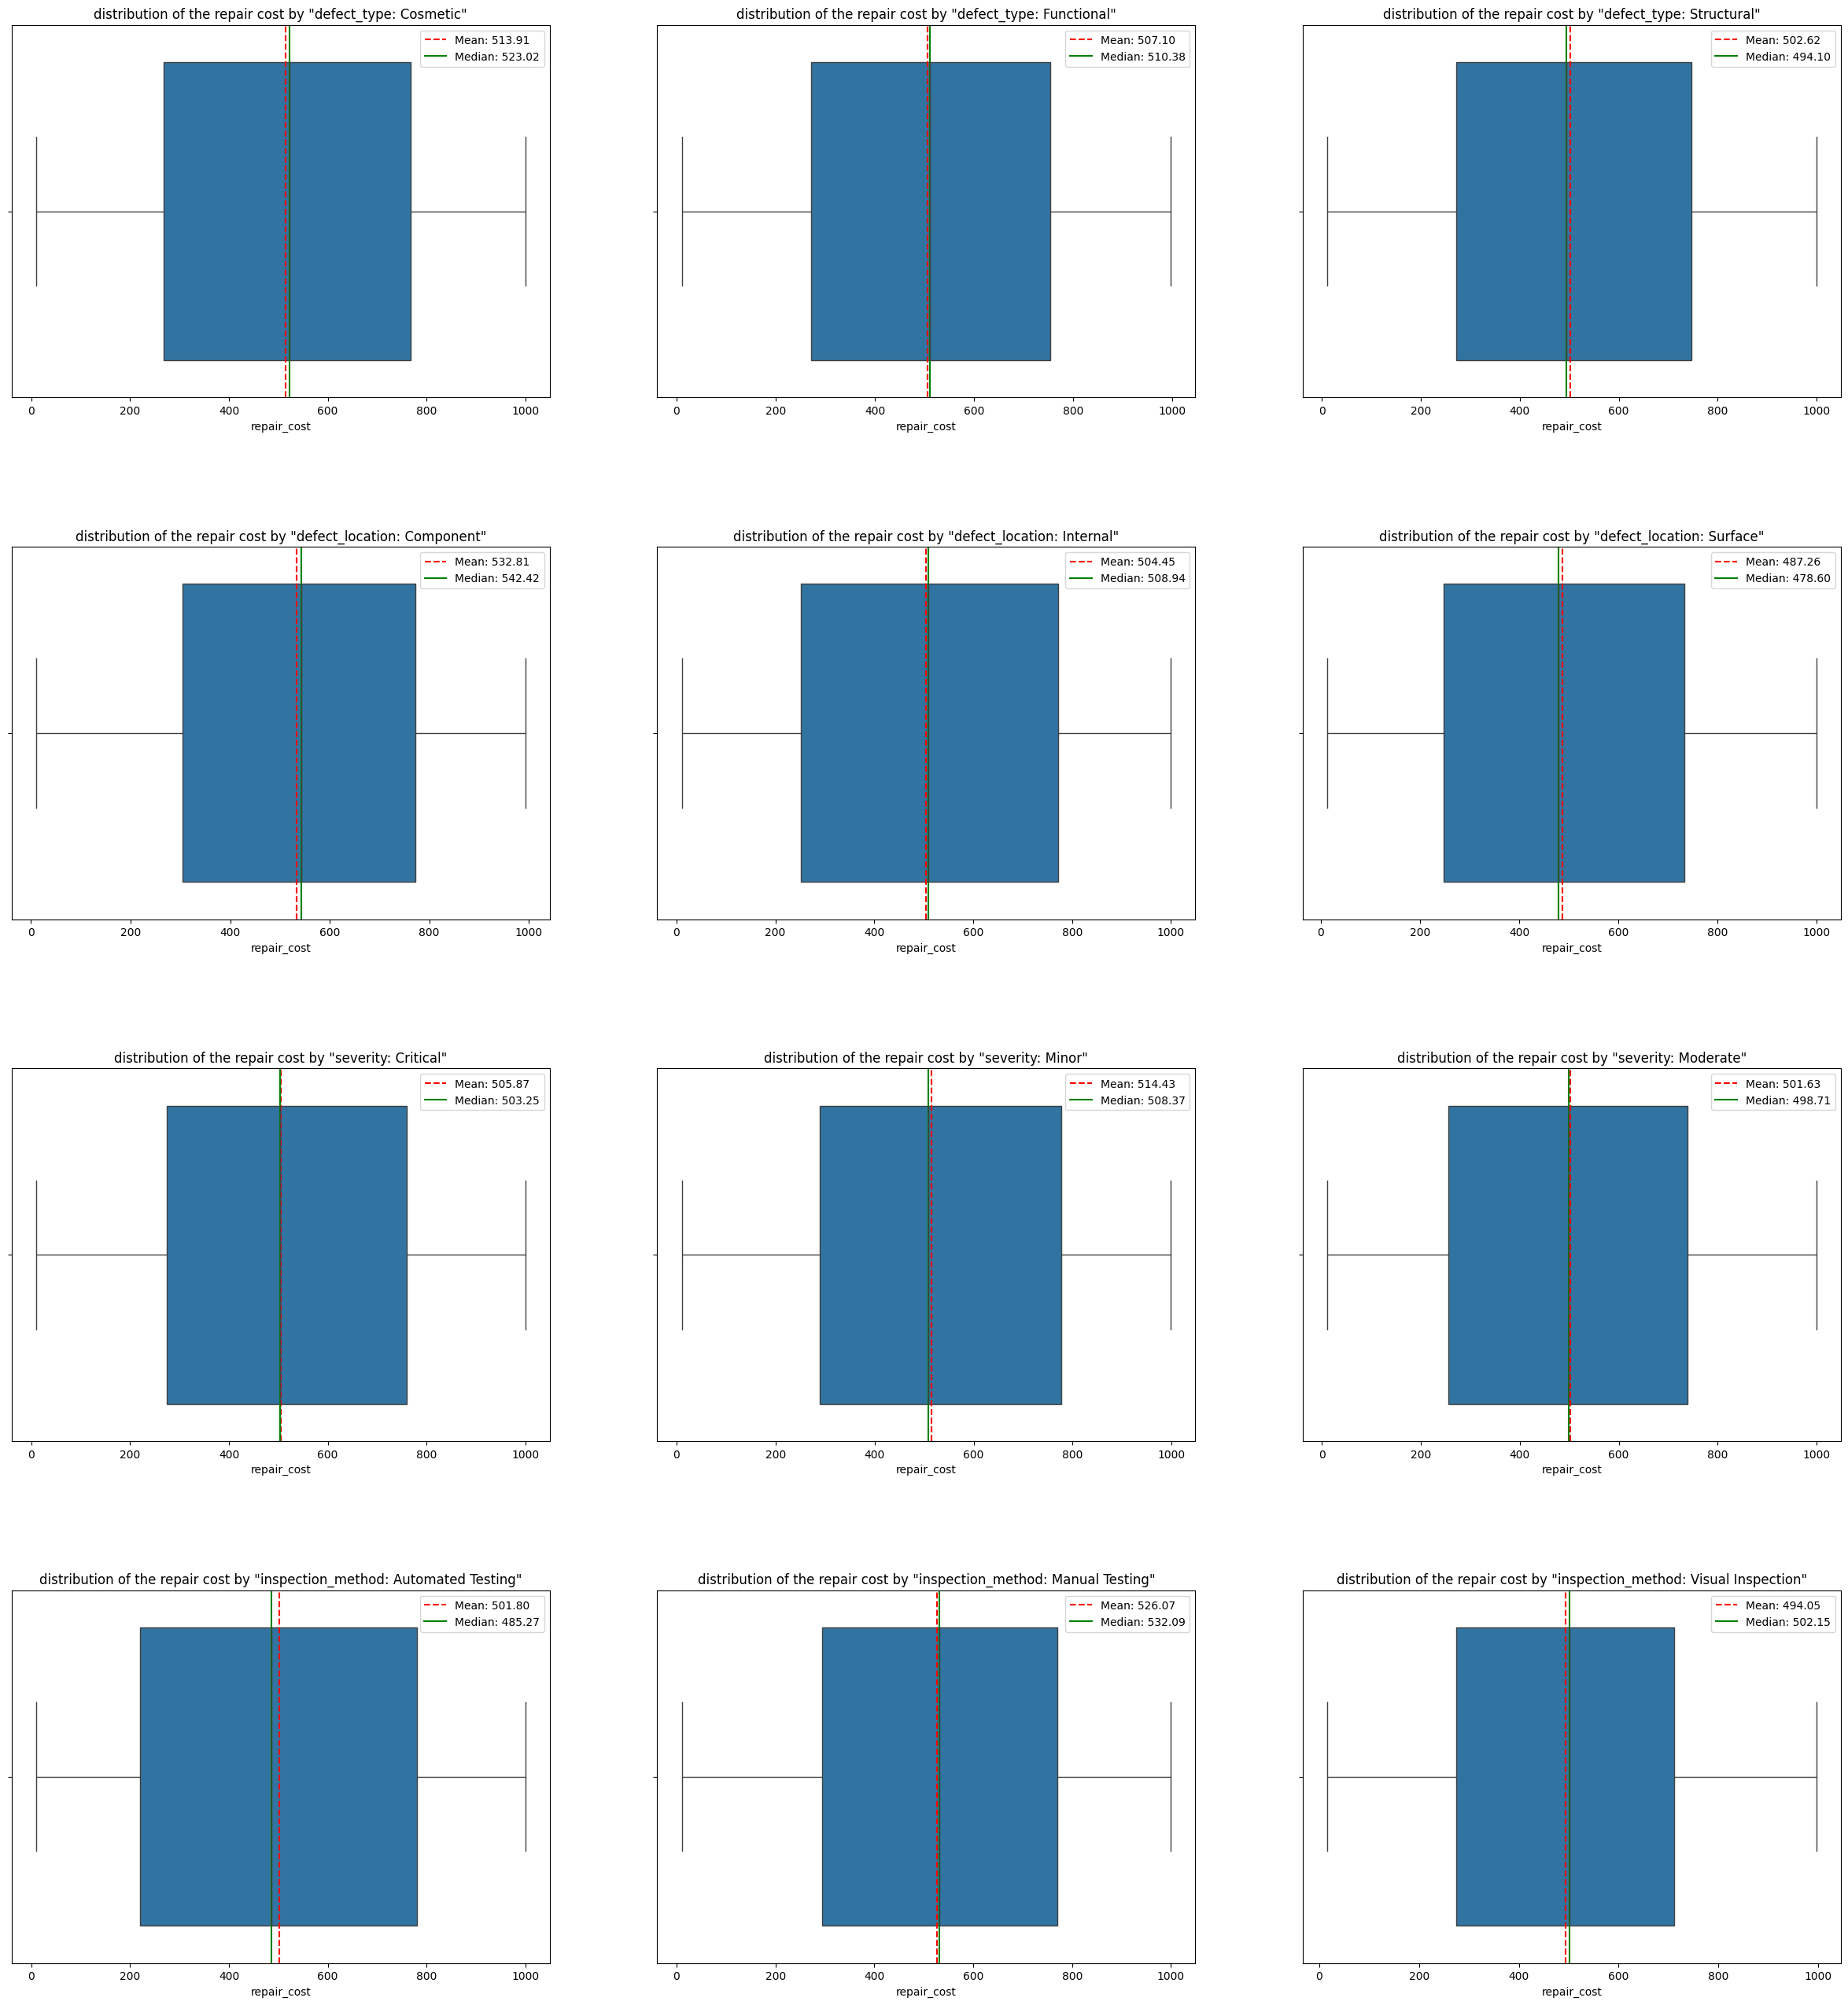

In [147]:
fig, ax = plt.subplots(nrows=len(selected_columns), ncols=3, figsize=(10*3, 8*len(selected_columns)))
plt.subplots_adjust(hspace=0.4)

for column_idx, (column, categorys) in enumerate(columns.items()):
    for category_idx, category in enumerate(categorys):
        temp_df = df[[f'{column}', 'repair_cost']].query(f'{column} == "{category}"')
        repair_cost_mean = temp_df['repair_cost'].mean()
        repair_cost_median = temp_df['repair_cost'].median()   
        sns.boxplot(temp_df, x='repair_cost', ax=ax[column_idx, category_idx])
        ax[column_idx, category_idx].set_title(f'distribution of the repair cost by "{column}: {category}"')
        ax[column_idx, category_idx].axvline(repair_cost_mean, color='r', linestyle='--', label=f'Mean: {repair_cost_mean:.2f}')
        ax[column_idx, category_idx].axvline(repair_cost_median, color='g', linestyle='-', label=f'Median: {repair_cost_median:.2f}')
        ax[column_idx, category_idx].legend()


As distribuição são muito semelhantes, sem presença de outliers e aparentemente possuem um custo de reparo bem semelhante (Próximo a $500), com poucas diferenças sendo os custos de reparos mais altos os de
Component, e os custo de reparo mais baratos os de Surface.

# Custo de reparo por data
Vamos avaliar qual data teve o maior custo de reparo, e tentar entender se houver valores discrepantes o que pode ter acontecido

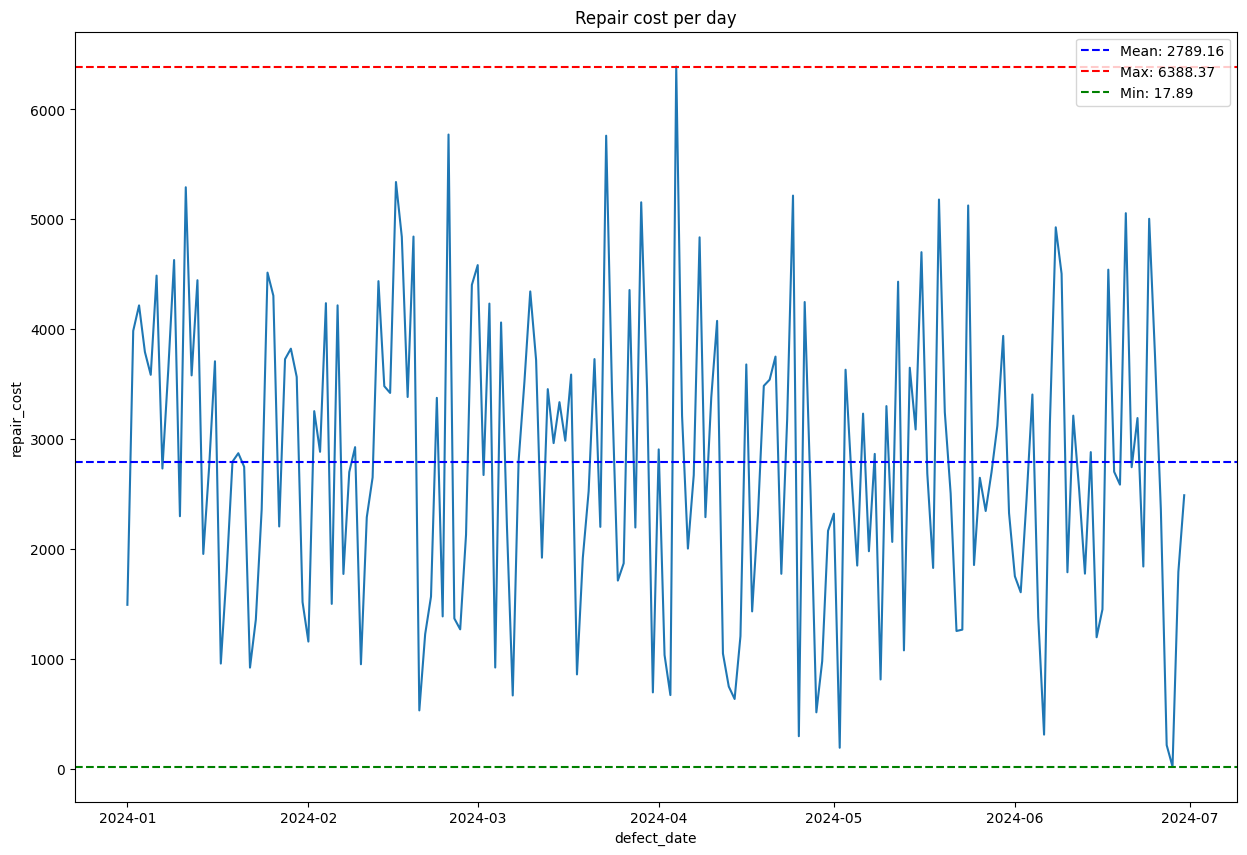

In [198]:
repair_cost_per_date = df.groupby(['defect_date'])['repair_cost'].sum().reset_index()
repair_cost_per_date['defect_date'] = pd.to_datetime(repair_cost_per_date['defect_date'])

plt.figure(figsize=(15, 10))
ax = sns.lineplot(repair_cost_per_date, x='defect_date', y='repair_cost')
repair_cost_mean = repair_cost_per_date['repair_cost'].mean()
repair_cost_max = repair_cost_per_date['repair_cost'].max()
repair_cost_min = repair_cost_per_date['repair_cost'].min()
ax.axhline(y= repair_cost_mean, color='b', linestyle='--', label=f'Mean: {repair_cost_mean:.2f}')
ax.axhline(y= repair_cost_max, color='r', linestyle='--', label=f'Max: {repair_cost_max:.2f}')
ax.axhline(y= repair_cost_min, color='g', linestyle='--', label=f'Min: {repair_cost_min:.2f}')
ax.set_title('Repair cost per day')
ax.legend()

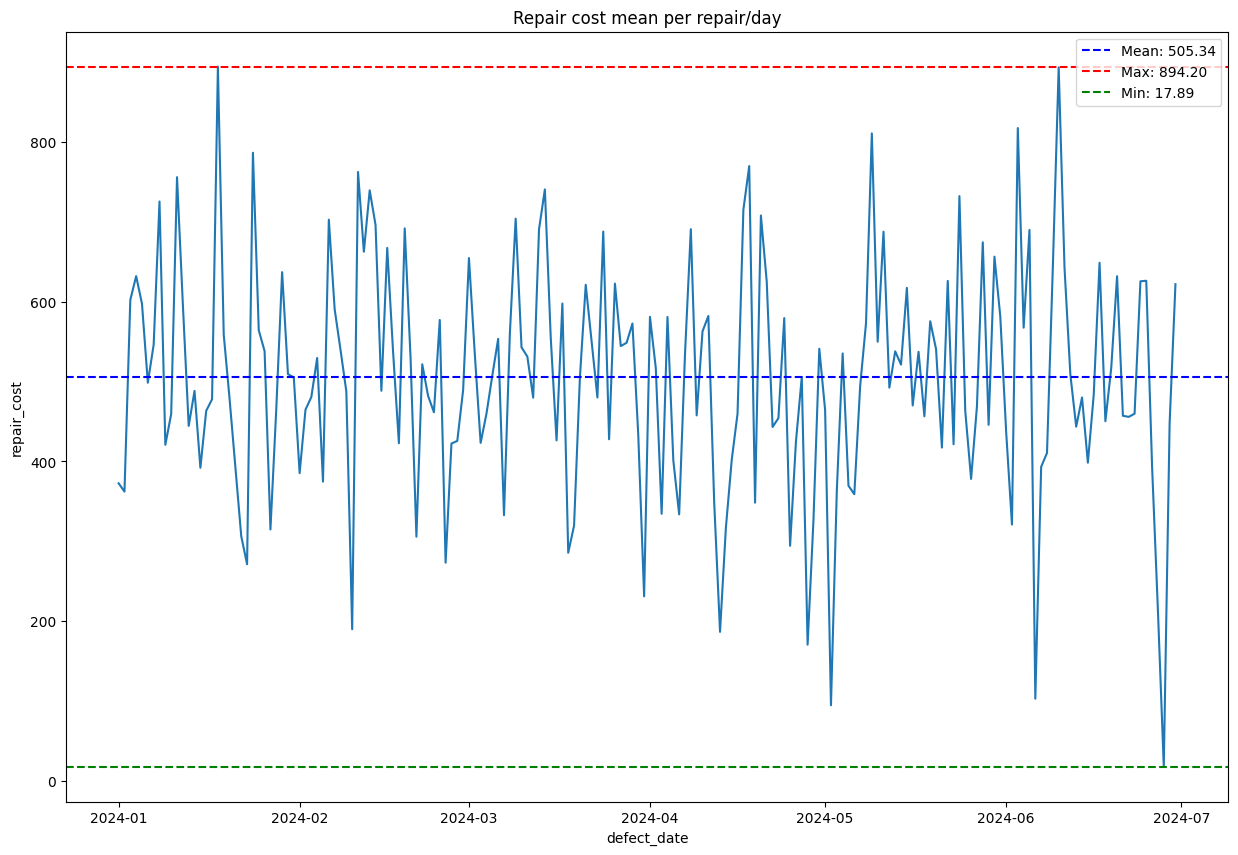

In [199]:
repair_cost_mean_per_date = df.groupby(['defect_date'])['repair_cost'].mean().reset_index()
repair_cost_mean_per_date['defect_date'] = pd.to_datetime(repair_cost_mean_per_date['defect_date'])

plt.figure(figsize=(15, 10))
ax = sns.lineplot(repair_cost_mean_per_date, x='defect_date', y='repair_cost')
repair_cost_mean = repair_cost_mean_per_date['repair_cost'].mean()
repair_cost_max = repair_cost_mean_per_date['repair_cost'].max()
repair_cost_min = repair_cost_mean_per_date['repair_cost'].min()
ax.axhline(y= repair_cost_mean, color='b', linestyle='--', label=f'Mean: {repair_cost_mean:.2f}')
ax.axhline(y= repair_cost_max, color='r', linestyle='--', label=f'Max: {repair_cost_max:.2f}')
ax.axhline(y= repair_cost_min, color='g', linestyle='--', label=f'Min: {repair_cost_min:.2f}')
ax.set_title('Repair cost mean per repair/day')
ax.legend()

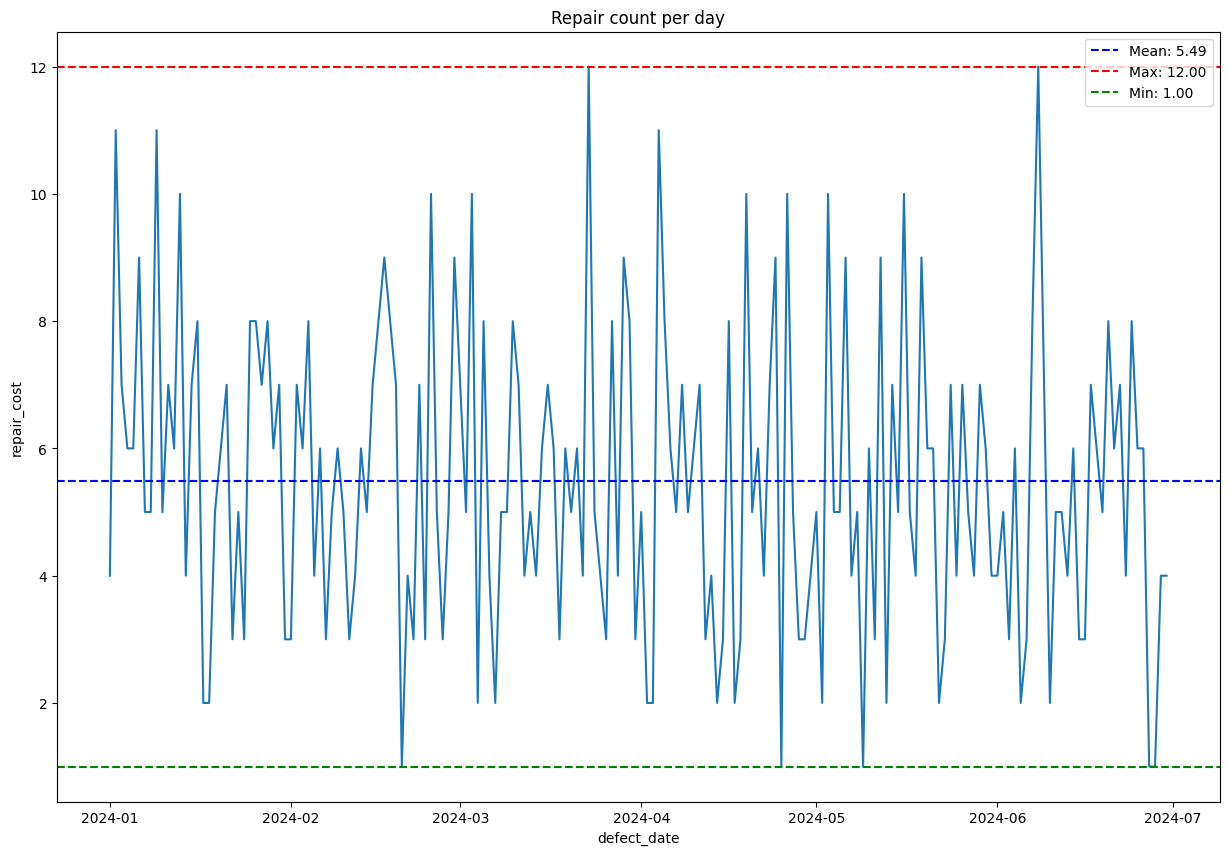

In [200]:
repair_cost_count_per_date = df.groupby(['defect_date'])['repair_cost'].count().reset_index()
repair_cost_count_per_date['defect_date'] = pd.to_datetime(repair_cost_mean_per_date['defect_date'])

plt.figure(figsize=(15, 10))
ax = sns.lineplot(repair_cost_count_per_date, x='defect_date', y='repair_cost')
repair_cost_mean = repair_cost_count_per_date['repair_cost'].mean()
repair_cost_max = repair_cost_count_per_date['repair_cost'].max()
repair_cost_min = repair_cost_count_per_date['repair_cost'].min()
ax.axhline(y= repair_cost_mean, color='b', linestyle='--', label=f'Mean: {repair_cost_mean:.2f}')
ax.axhline(y= repair_cost_max, color='r', linestyle='--', label=f'Max: {repair_cost_max:.2f}')
ax.axhline(y= repair_cost_min, color='g', linestyle='--', label=f'Min: {repair_cost_min:.2f}')
ax.set_title('Repair count per day')
ax.legend()

### O custo médio dos reparos por dia fica em torno de $2789.16, com cerca de 5.5 reparos por dia, com um custo médio de $505.34 por cada um dos reparos
Dito isso vamos ver quais os defect_location mais acontecem no decorrer dos dias

In [275]:
df_columms = ['defect_location', 'inspection_method', 'severity', 'defect_type']


for df_column in df_columms:

    df_date_location = df[['defect_date', df_column]]
    attrs = np.unique(df_date_location[df_column].values)

    df_date_location_list = []

    for attr in attrs:
        temp_df = df_date_location.query(f'{df_column} == "{attr}"')
        temp_df = temp_df.groupby(['defect_date'])[df_column].count()
        temp_df = temp_df.reset_index()
        temp_df.rename(columns={df_column: f'defect_{attr}_count'}, inplace=True)
        df_date_location_list.append(temp_df)

    df_date_location_combined = pd.merge(df_date_location_list[0], df_date_location_list[1], on='defect_date', how='outer')
    df_date_location_combined = pd.merge(df_date_location_list[2], df_date_location_combined, on='defect_date', how='outer')
    df_date_location_combined.fillna(0, inplace=True)

    df_date_location_combined['defect_date'] = pd.to_datetime(df_date_location_combined['defect_date'])
    df_date_location_combined_columns = df_date_location_combined.columns[1::]

    print(f"{df_column} repair count:\n".upper())
    for column in df_date_location_combined_columns:
        mean_repairs = df_date_location_combined[column].mean()
        min_repairs = df_date_location_combined[column].min()
        max_repairs = df_date_location_combined[column].max()
        
        print('--**--'*5)
        print(f'{column}:'.upper())
        print(f'Mean Count Repairs: {mean_repairs:.1f}')
        print(f'Max Count Repairs:  {max_repairs}')
        print(f'Min Count Repairs:  {min_repairs}')


    df_date_location = df[['defect_date', df_column, 'repair_cost']]
    attrs = np.unique(df_date_location[df_column].values)

    df_date_location_list = []

    for attr in attrs:
        temp_df = df_date_location.query(f'{df_column} == "{attr}"')
        temp_df = temp_df.groupby(['defect_date'])['repair_cost'].mean()
        temp_df = temp_df.reset_index()
        temp_df.rename(columns={'repair_cost': f'defect_{attr}_cost'}, inplace=True)
        df_date_location_list.append(temp_df)

    df_date_location_combined = pd.merge(df_date_location_list[0], df_date_location_list[1], on='defect_date', how='outer')
    df_date_location_combined = pd.merge(df_date_location_list[2], df_date_location_combined, on='defect_date', how='outer')
    df_date_location_combined.fillna(0, inplace=True)

    df_date_location_combined['defect_date'] = pd.to_datetime(df_date_location_combined['defect_date'])
    df_date_location_combined_columns = df_date_location_combined.columns[1::]

    print(f"\n{df_column} repair cost\n".upper())
    for column in df_date_location_combined_columns:
        mean_repairs = df_date_location_combined[column].mean()
        min_repairs = df_date_location_combined[column].min()
        max_repairs = df_date_location_combined[column].max()
        
        print('--**--'*5)
        print(f'{column}:'.upper())
        print(f'Mean Cost Repairs: {mean_repairs:.1f}')
        print(f'Max Cost Repairs:  {max_repairs:.1f}')
        print(f'Min Cost Repairs:  {min_repairs:.1f}')


DEFECT_LOCATION REPAIR COUNT:

--**----**----**----**----**--
DEFECT_SURFACE_COUNT:
Mean Count Repairs: 1.9
Max Count Repairs:  6.0
Min Count Repairs:  0.0
--**----**----**----**----**--
DEFECT_COMPONENT_COUNT:
Mean Count Repairs: 1.8
Max Count Repairs:  6.0
Min Count Repairs:  0.0
--**----**----**----**----**--
DEFECT_INTERNAL_COUNT:
Mean Count Repairs: 1.8
Max Count Repairs:  7.0
Min Count Repairs:  0.0

DEFECT_LOCATION REPAIR COST

--**----**----**----**----**--
DEFECT_SURFACE_COST:
Mean Cost Repairs: 423.3
Max Cost Repairs:  966.7
Min Cost Repairs:  0.0
--**----**----**----**----**--
DEFECT_COMPONENT_COST:
Mean Cost Repairs: 426.8
Max Cost Repairs:  975.5
Min Cost Repairs:  0.0
--**----**----**----**----**--
DEFECT_INTERNAL_COST:
Mean Cost Repairs: 414.3
Max Cost Repairs:  997.0
Min Cost Repairs:  0.0
INSPECTION_METHOD REPAIR COUNT:

--**----**----**----**----**--
DEFECT_VISUAL INSPECTION_COUNT:
Mean Count Repairs: 1.9
Max Count Repairs:  8.0
Min Count Repairs:  0.0
--**----**----*

Levando em consideração o custo de reparo médio e a contagem de reparos por dia de cada um dos 'defect_location', 'inspection_method', 'severity' e 'defect_type', chegamos a conclusão que a distruição dos custo de reparo para cada uma das categorias são semelhantes

## Conclusão

Levando em consideração todas as análises realizadas anteriormente, pode-se concluir que o custo de reparo médio diário segue uma distribuição aleatória, porém dentro de um intervalo determinado, como evidenciado nos gráficos de "custo de reparo por dia" e "contagem de reparos por dia". Além disso, é importante considerar os custos de reparo e a contagem de reparos por atributo de cada coluna apresentados anteriormente. Com base nisso, podemos concluir que a média do custo de reparo é em torno de $500 e que cada tipo de defeito ocorre na mesma proporção ao longo dos dias. Ademais, não há discrepância nos gastos relacionados ao reparo de cada atributo, como localização, gravidade e métodos de inspeção, indicando que todos eles ocorrem com a mesma frequência e apresentam gastos muito semelhantes.